In [37]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from dask.diagnostics import ProgressBar
import time

mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['font.size'] =30
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['legend.fontsize'] = 20 #30
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'


### Merges output to one netcdf per region

In [2]:
READING_DIR='out/run_CMIP6'

In [5]:
for REGION in ['16']:
    read_dir = os.path.join(READING_DIR, 'region_'+REGION,'*.nc')
    print(read_dir)
    with ProgressBar():
        ds = xr.open_mfdataset(read_dir, parallel=True)
        ds.to_netcdf(os.path.join(READING_DIR, REGION+'_equilibrium.nc'))
        print('region '+REGION+' DONE')

out/run_CMIP6/region_16/*.nc
[########################################] | 100% Completed | 31.4s
[########################################] | 100% Completed | 33.6s
region 16 DONE


In [6]:
ds

<xarray.Dataset>
Dimensions:           (rgi_id: 2484, gcm: 12, year: 133)
Coordinates:
  * rgi_id            (rgi_id) object 'RGI60-16.00001' ... 'RGI60-16.02945'
  * gcm               (gcm) object 'IPSL-CM5A2-INCA' 'E3SM-1-1' ... 'KACE-1-0-G'
  * year              (year) int64 1866 1867 1868 1869 ... 1995 1996 1997 1998
Data variables:
    equilibrium       (rgi_id, gcm, year) float64 dask.array<chunksize=(1, 12, 133), meta=np.ndarray>
    equilibrium_area  (rgi_id, gcm, year) float64 dask.array<chunksize=(1, 12, 133), meta=np.ndarray>
    run_time          (rgi_id, gcm, year) float64 dask.array<chunksize=(1, 12, 133), meta=np.ndarray>
Attributes:
    description:    OGGM model output
    oggm_version:   1.5.3.dev14+g25c4675
    calendar:       365-day no leap
    creation_date:  2021-12-17 19:51:29

In [ ]:
ds.to_netcdf(os.path.join(READING_DIR, REGION+'_equilibrium_delay.nc'))

## Read all regional output

In [10]:
with ProgressBar():
    p = os.path.join(READING_DIR,'*_equilibrium.nc')
    all_ds = xr.open_mfdataset(p, parallel=True)

[########################################] | 100% Completed |  0.4s


In [30]:
# drop glaciers where all runs failed
all_ds = all_ds.dropna(dim='rgi_id',how='all')
#sort by gcm
all_ds = all_ds.sortby('gcm')

### Plot results

In [25]:
from matplotlib import colors
gcm_cmap=[colors.to_rgb('#'+c) for c in ["264653","264653","264653","2a9d8f","2a9d8f","2a9d8f","2a9d8f","fac723","FB8B24","FB8B24","FB8B24","9A031E"]]

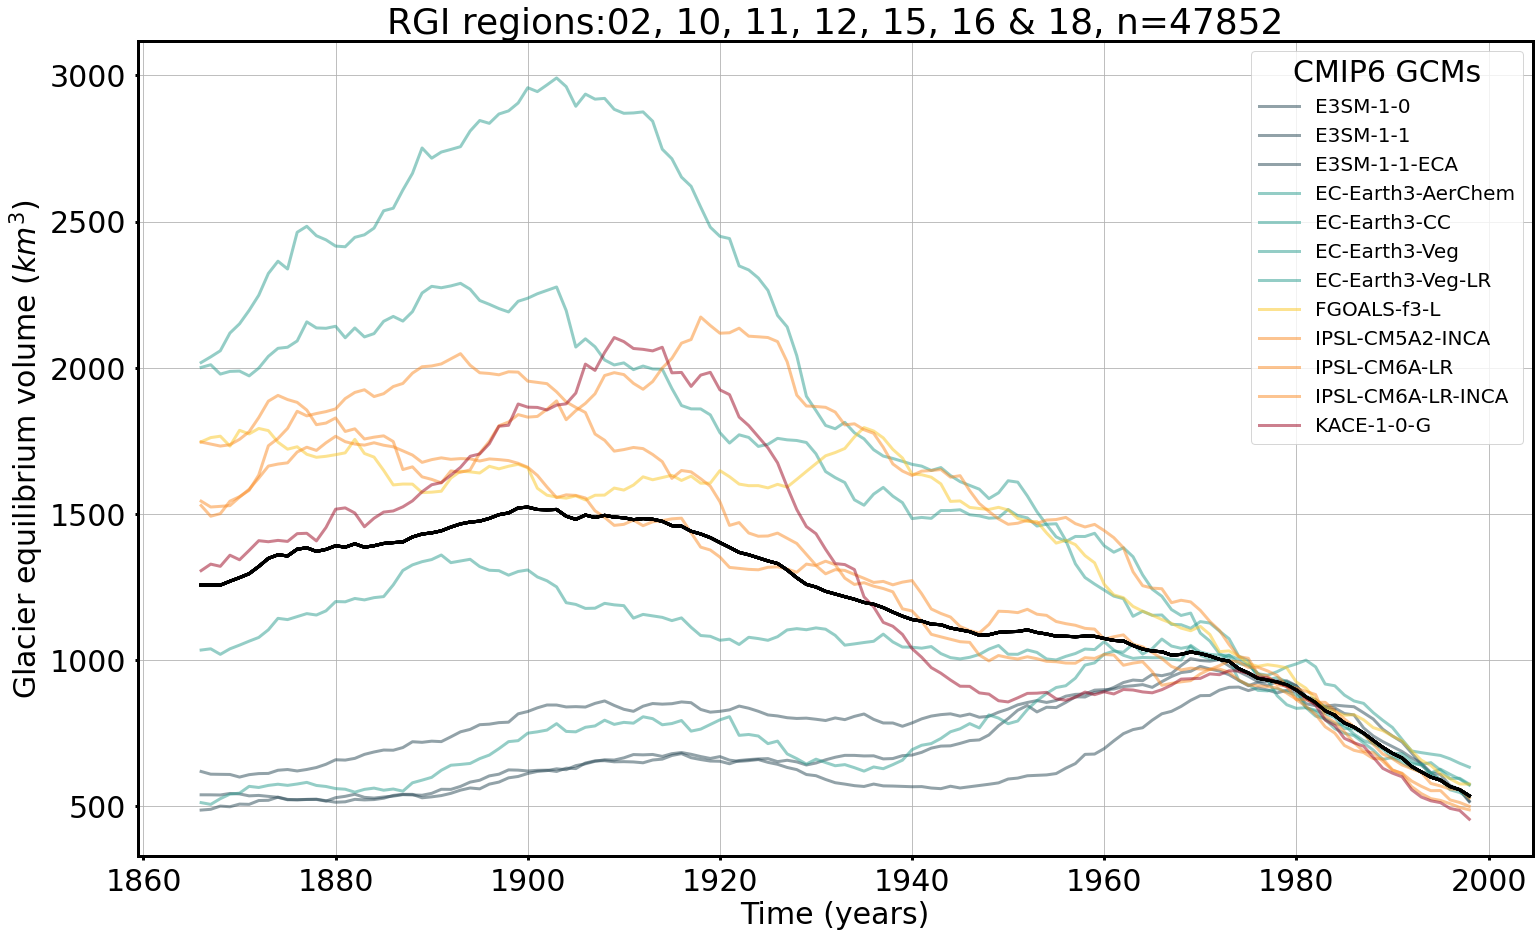

In [40]:
fig,ax = plt.subplots(figsize=(25,15))
for i,gcm in enumerate(all_ds.gcm):
    if gcm!='E3SM-1-0':
        all_ds.equilibrium.sel(gcm=gcm).sum(dim='rgi_id').plot.line(ax=ax,c=gcm_cmap[i],label=gcm.values,alpha=0.5)
    else:
        all_ds.equilibrium.sel(gcm=gcm,year=range(1866,1985)).sum(dim='rgi_id').plot.line(ax=ax,c=gcm_cmap[i],label=gcm.values,alpha=0.5)
    #calculate mean
    all_ds.equilibrium.sel(year=range(1866,1985)).sum(dim='rgi_id').mean(dim='gcm').plot(color='k')
    all_ds.equilibrium.drop_sel(gcm='E3SM-1-0').sel(year=range(1984,1999)).sum(dim='rgi_id').mean(dim='gcm').plot(color='k')

plt.title('RGI regions:02, 10, 11, 12, 15, 16 & 18'+', n='+str(len(all_ds.rgi_id)))
plt.xlabel('Time (years)')
plt.ylabel(r'Glacier equilibrium volume ($km^3$)')

plt.legend(title='CMIP6 GCMs')
plt.grid();

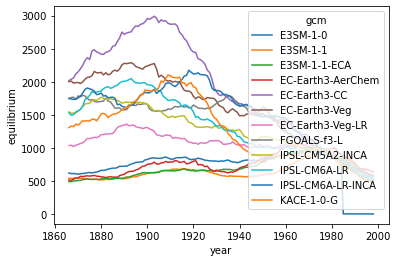

In [31]:
all_ds.equilibrium.sum(dim='rgi_id').plot.line(hue='gcm');

In [ ]:
ds.equilibrium.sum(dim='rgi_id').plot.line(hue='gcm');